# carpriceprediction

Use the "Run" button to execute the code.

In [4]:
#jovian commit essentials

!pip install jovian --upgrade -q
import jovian
jovian.set_project('carpriceprediction')
jovian.set_colab_id('1tTkwL6GFYfs6ncZsUYpY2-KR8wZ95ZjE')

In [5]:
pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho'

od.download(dataset_url)
#username = {wahustacyanne}
#password = {f88d51e14846b2cb95ebf1daf6ff9e9d}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: wahustacyanne
Your Kaggle Key: ··········


100%|██████████| 292k/292k [00:00<00:00, 54.5MB/s]

Importing the Dependencies

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection & Processing

In [8]:
# loading the dataset to a Pandas DataFrame
car_dataset = pd.read_csv('/content/vehicle-dataset-from-cardekho/car data.csv')
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
 # first 5 rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# number of rows & columns
car_dataset.shape

(301, 9)

In [11]:
# information about  the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
# checking for missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
# checking the distributon of categorical data
print(car_dataset.value_counts('Fuel_Type'))
print(car_dataset.value_counts('Seller_Type'))
print(car_dataset.value_counts('Transmission'))

Fuel_Type
Petrol    239
Diesel     60
CNG         2
dtype: int64
Seller_Type
Dealer        195
Individual    106
dtype: int64
Transmission
Manual       261
Automatic     40
dtype: int64


Encoding the categorical data

In [19]:
# encoding the 'Fuel_Type' column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding the 'Seller_Type' column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding the 'Transmission' column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [20]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Train & Test split

In [23]:
# Separate the data and label
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=True)
y = car_dataset.Selling_Price

In [24]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2)

Model Training:

1. LinearRegression

In [28]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [29]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [30]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(x_train)

In [32]:
# R squared error
error_score = metrics.r2_score(y_train,training_data_prediction)
print('R squared Error: ',error_score)

R squared Error:  0.8799451660493711


Visualize the actual prices and predicted prices

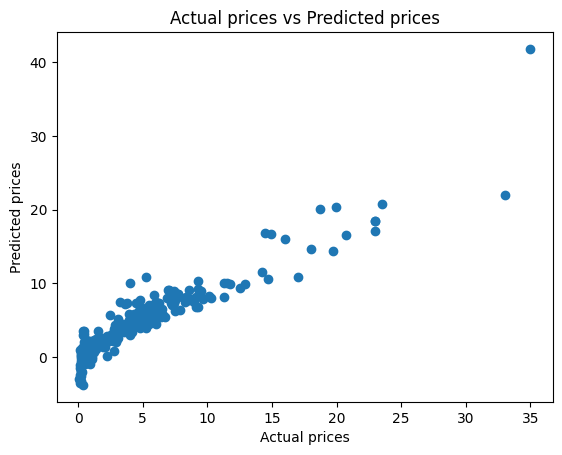

In [33]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [34]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(x_test)

In [35]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squared Error: ',error_score)

R squared Error:  0.8365766715027051


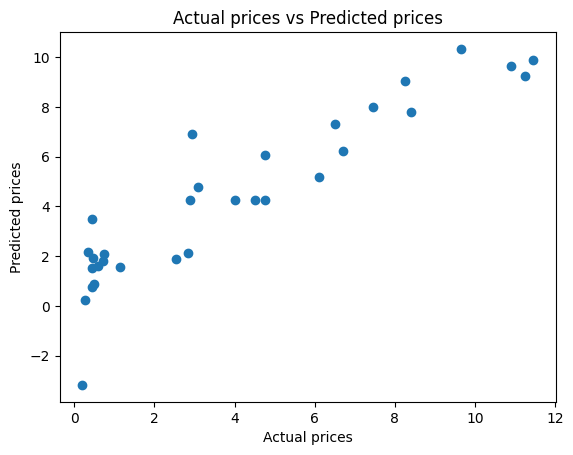

In [36]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

2. Lasso Regression

In [39]:
# loading the linear regression model
lass_reg_model = Lasso()

In [40]:
lass_reg_model.fit(x_train,y_train)

Lasso()

Model Evaluation

In [41]:
# prediction on training data
training_data_prediction = lass_reg_model.predict(x_train)

In [42]:
# R squared error
error_score = metrics.r2_score(y_train,training_data_prediction)
print('R squared Error: ',error_score)

R squared Error:  0.8427856123435794


Visualize the actual prices and predicted prices

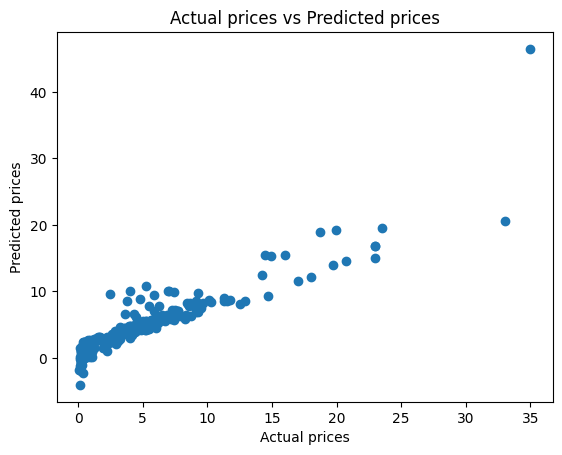

In [43]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [44]:
# prediction on test data
test_data_prediction = lass_reg_model.predict(x_test)

In [45]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squared Error: ',error_score)

R squared Error:  0.8709167941173195


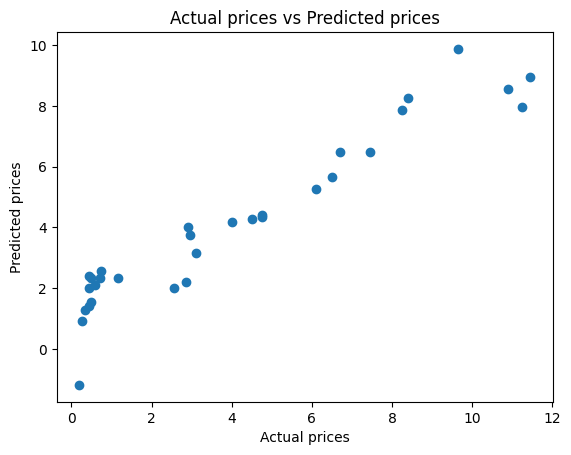

In [46]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [47]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY: